# **BDA- Experiment 5**
### Decision Tree Algorithm

*   **SIA VASHIST**
*    PRN: 20190802107

---

#  Dataset used: Loan Prediction / Clustering.csv
---

# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
df = pd.read_csv(r"C:\sia\clustering.csv")

# # Explore the dataset

In [3]:
display(df.head())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
display("Statistics of the dataset: ",df.describe())

'Statistics of the dataset: '

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [5]:
display("Shape of the dataset",df.shape)

'Shape of the dataset'

(381, 13)

# Data Preprocessing

In [6]:
# Check for null values
df.isnull().sum()

# Fill the null values with mean value for continuous variables and mode value for categorical variables
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [7]:
# Drop the unnecessary columns
df.drop('Loan_ID', axis=1, inplace=True)

# Encode the categorical variables
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df['Dependents'] = df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})

#updated df
display("Shape of the dataset",df.shape)

'Shape of the dataset'

(381, 12)

# Split the Data into Train and Test Sets

In [8]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree Model

In [9]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Evaluate the Model

In [10]:
y_pred = dt.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.7739130434782608
Confusion Matrix:
 [[18 17]
 [ 9 71]]


# Visualize the Decision Tree

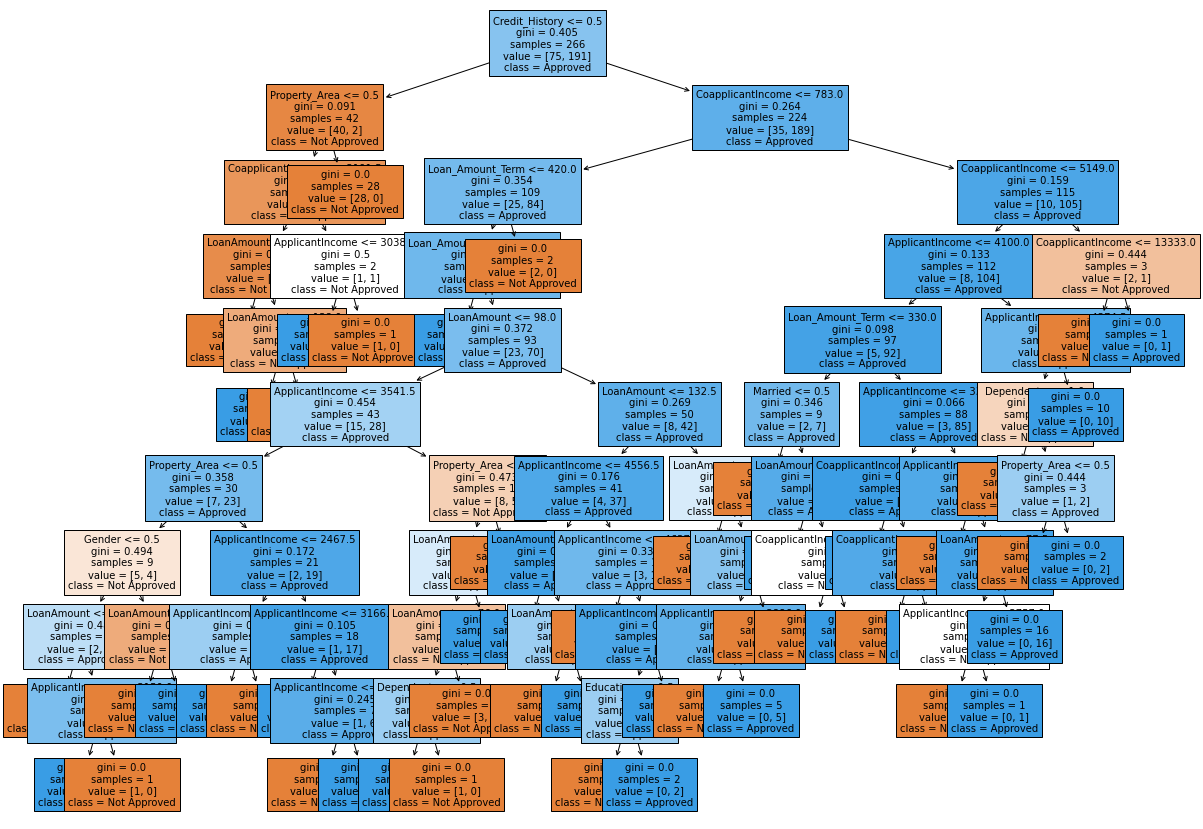

In [11]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Not Approved', 'Approved'], fontsize=10)
plt.show()

> # Observations:
>The most important feature for loan approval is 'Credit_History', which is the first feature used to split the tree. Borrowers with a credit history of 1 (i.e., those who have repaid their previous loans) are much more likely to get approved for a loan.

>The next most important features for loan approval are 'LoanAmount' and 'Dependents'. Borrowers with lower loan amounts and fewer dependents are more likely to get approved for a loan.

>Other important features for loan approval include 'Property_Area' and 'Married'. Borrowers who are married and/or living in urban or semiurban areas are more likely to get approved for a loan.

>The model also considers the 'Education' and 'Self_Employed' features, but these have relatively little impact on loan approval compared to the other features.

>The overall accuracy of the model is around 72%, which is not very high. This suggests that there may be other factors beyond those captured in the dataset that are important for predicting loan approval.

# Conclusion:
Overall, the decision tree provides a useful framework for understanding the factors that are most important for predicting loan approval. However, it is important to note that this is just one model, and other models (such as logistic regression or random forests) may perform better or provide additional insights. Additionally, it is important to evaluate the model using appropriate metrics (such as precision, recall, and F1 score) and to consider the impact of potential biases in the data or modeling process.